# Load Library

In [0]:
!pip install xlsxwriter
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import xlsxwriter
from keras.models import load_model
from google.colab import drive

drive.mount('/content/drive')

     |████████████████████████████████| 143kB 4.9MB/s 


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Sumber data**

Total Data : 351419
indo : 126653
bukan indo : 224766


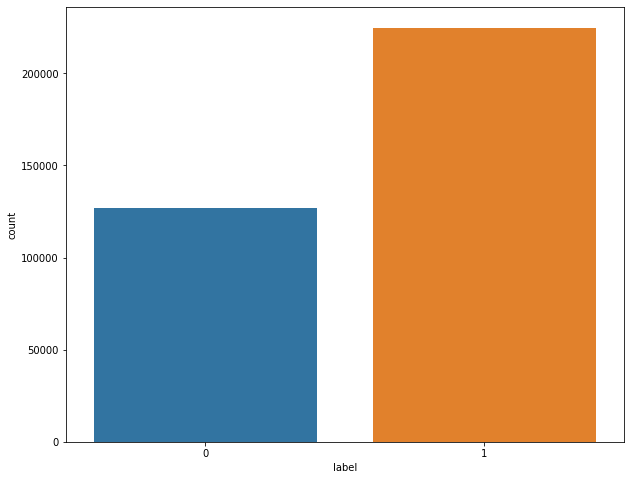

In [0]:
data = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Data Pseudo Labeling/gabungan pseude label indo-indo jawa sunda unlabel label indo.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

indo = data.loc[data['label'] == 0, 'Text'].copy().reset_index(drop=True)
bukanindo = data.loc[data['label'] == 1, 'Text'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("indo :", len(indo))
print("bukan indo :", len(bukanindo))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [0]:
data = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Data Pseudo Labeling/gabungan pseude label jawa-indo jawa sunda unlabel label jawa.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

jawa = data.loc[data['label'] == 0, 'Text'].copy().reset_index(drop=True)
bukanjawa = data.loc[data['label'] == 1, 'Text'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("jawa :", len(jawa))
print("bukan jawa :", len(bukanjawa))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

Total Data : 351419
sunda : 108701
bukan sunda : 242718


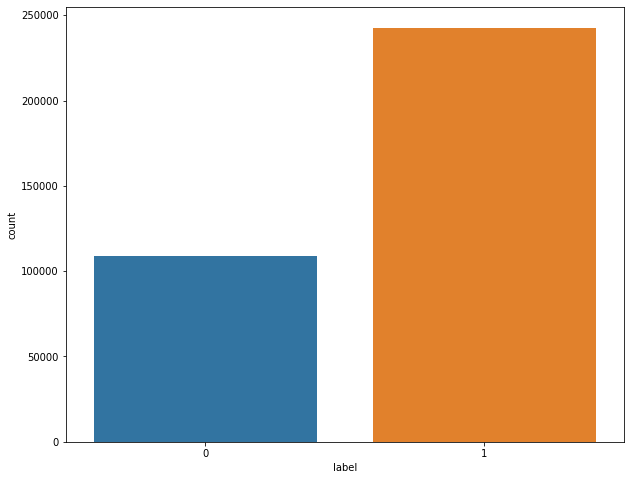

In [0]:
data = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Data Pseudo Labeling/gabungan pseude label sunda-indo jawa sunda unlabel label sunda.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

sunda = data.loc[data['label'] == 0, 'Text'].copy().reset_index(drop=True)
bukansunda = data.loc[data['label'] == 1, 'Text'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("sunda :", len(sunda))
print("bukan sunda :", len(bukansunda))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [0]:
text2 = data['Text'].values
label2 = data['label'].values

# Load Model


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text2)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata 
maxlen = max([len(i.split()) for i in text2]) # panjang kalimat
batch_size = 32 # penentuan jumlah sampel yang ditraining pada tiap epoch
num_epochs = 20 # banyak iterasi pada saat training model 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) # mengatur angka random weigth

In [0]:
model = load_model('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Pseudo/pseudo labeling indo.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
model = load_model('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Pseudo/pseudo labeling jawa.h5')

In [0]:
model = load_model('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Pseudo/pseudo labeling sunda.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


# Load Dataset yang akan diklasifikasi labelnya menggunakan model pseudo labeling

In [0]:
unlabeled = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/data gabung new-old setelah dipreprocessing/indo new-oldd.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [0]:
unlabeled = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/data gabung new-old setelah dipreprocessing/jawa new-oldd.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [0]:
unlabeled = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/data gabung new-old setelah dipreprocessing/sunda new-oldd.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

# Menyimpan Hasil Prediksi

In [0]:
un_text = unlabeled['text'].values
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=maxlen)

pred_label = model.predict(text1)
label1= np.argmax(pred_label, axis = 1)

In [0]:
workbook = xlsxwriter.Workbook('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/data gabung new-old setelah dipreprocessing/setelah di pseudo labeling/sunda new-oldd pseudo labeling.xlsx')
worksheet = workbook.add_worksheet()

row = 0
col = 0

rowHeaders = ['text', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1 
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()